# <b>Mushrooms Type Prediciton<b/>

I will do mushroom type classification based on dependent features variable such as cap, gill, stalk, veil and other features that have impact on each classification group.

For this project i use dataset from kaggle, you can get dataset here:                                                                      
https://www.kaggle.com/datasets/uciml/mushroom-classification

#### <b>Data Exploration</b>

Import needed Library

In [125]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

Import dataset, check the null values and data types each columns

In [126]:
df = pd.read_csv("../CSV file/mushrooms.csv")
df.head()
df.isnull().sum()
df.dtypes
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Knowing Unique value each column 

In [127]:
for col in df:
    print(f"{col} : {df[col].unique()}")

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


#### <b>Data Preprocessing</b>

Convert Unknown column

In [128]:
eliminated = df[df["stalk-root"] == "?"]
df["stalk-root"] = df["stalk-root"].replace(["?"], "unknown")

Convert Object to binary (for feature columns)

In [129]:
df1 = pd.get_dummies(df.drop(["class"], axis="columns"))
df1 = pd.concat([df1, df["class"]], axis="columns")

na_values = df1.isna().any()

df["class"]

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

Cause There is too much feature, i'll only pick top 32 feature with selectKbest for avoid overfit issue

In [130]:
X = df1.drop(["class"], axis="columns")
y = df1["class"]

selector = SelectKBest(chi2, k=16)

selector.fit(X, y)

selected_features = selector.transform(X)
selected_features = pd.DataFrame(selected_features)
df1 = pd.concat([selected_features, y], axis="columns")

X = df1.drop(["class"], axis="columns")
y = df1["class"]

X.shape

(8124, 16)

Correlation Matrix for 32 selected feature with target (class column)

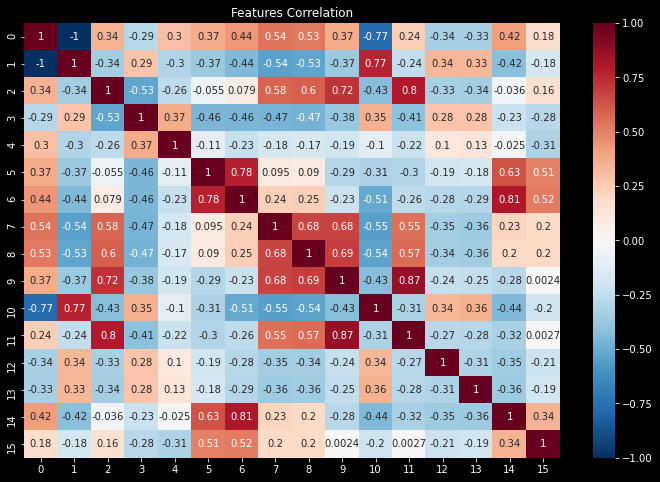

In [131]:
corr_pearson = df1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_pearson, cmap="RdBu_r",annot=True)

plt.title('Features Correlation')
plt.show()

Oversampling for increase F1 score

In [132]:
countcls =  df1["class"].value_counts()
df_e = df1[df1["class"] == "e"]
df_p = df1[df1["class"] == "p"]

df1over = df_p.sample(countcls[0], replace=True)
oversml = pd.concat([df_e, df1over], axis=0)
oversml.shape

(8416, 17)

Separate features and target also train test split

In [133]:
X = oversml.drop(["class"],axis="columns")
y = oversml["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=6)

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
6860,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0
7850,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1
6824,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1
5365,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1
3436,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7466,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1
5566,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4214,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0
4372,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1


#### <b>Model Building</b>

Search best classifier with GridSearch

In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grids for Decision Trees, SVM and Logistic Regression
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 4, 6, 8]}
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf']}
param_grid_lr = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

# Initialize the models
dt = DecisionTreeClassifier()
svm = SVC()
lr = LogisticRegression()

# Create a list of tuples with the models and their respective hyperparameter grids
models = [(dt, param_grid_dt), (svm, param_grid_svm), (lr, param_grid_lr)]


Print best classifier and best parameter, i'll use Decission Tree cause have higher score than SVM and Logistic Regression

In [135]:
# Loop through the models and perform grid search on each
for model, param_grid in models:
    grid = GridSearchCV(model, param_grid, cv=5)
    grid.fit(X, y)
    print("Best parameters for ", model.__class__.__name__, ":", grid.best_params_)
    print("Best score:", grid.best_score_)

Best parameters for  DecisionTreeClassifier : {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best score: 0.9885918003565063
Best parameters for  SVC : {'C': 0.1, 'kernel': 'linear'}
Best score: 0.9638807383602689


c:\Users\hilla\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\hilla\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hilla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\hilla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\hilla\anaconda3\lib\site-packages\sklearn\model_selection\_v

Best parameters for  LogisticRegression : {'C': 0.1, 'penalty': 'l2'}
Best score: 0.9642372445991281


Train Model and print classification report

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       854
           p       1.00      1.00      1.00       830

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



1.0

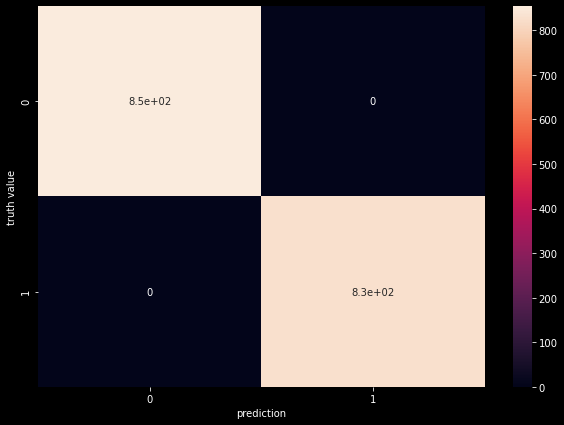

In [141]:
classifier = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=2)
classifier.fit(X_train, y_train)

#model Report
print(classification_report(y_test, classifier.predict(X_test)))

#confussion 
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, classifier.predict(X_test)), annot=True)
plt.xlabel("prediction")
plt.ylabel("truth value")

classifier.score(X_test, y_test)

<b>test</b>